# Initialisation

In [1]:
%matplotlib inline 
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (
    create_eog_epochs,
    create_ecg_epochs,
    compute_proj_ecg,
    compute_proj_eog,
)
import sys
sys.path.append('/data/home/saletache/scikits-symbolic/symbolic')
import sequence as S
import discretize as D
from algorithmic import lempel_ziv
from scipy import stats

ModuleNotFoundError: No module named 'sequence'

# Importation des données : vicual task and audio task

In [2]:
data_path = '/data/home/saletache/Data_MEG/sub-V1001/'
raw_file = data_path + 'meg/sub-V1001_task-visual_meg.ds'
raw_vis = mne.io.read_raw_ctf(raw_file)

# Affichage des informations sur les canaux
print(raw_vis.info)
raw_vis

ds directory : /home/lucas/Documents/Data_MEG/sub-V1001/meg/sub-V1001_task-visual_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -0.50   80.15    0.00 mm <->   -0.50   80.15    0.00 mm (orig :  -71.73   42.77 -259.14 mm) diff =    0.000 mm
       0.50  -80.15    0.00 mm <->    0.50  -80.15    0.00 mm (orig :   37.79  -74.15 -264.78 mm) diff =    0.000 mm
     108.63    0.00    0.00 mm <->  108.63   -0.00   -0.00 mm (orig :   62.71   58.11 -264.02 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 4 EEG channels from channel info
    4 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /home/lucas/Documents/Data_MEG/sub-V1001/meg/sub-V1001_task-visual_meg.ds/sub-V1001_task-visual_meg.meg4: 
    System clock channel is a

<RawCTF | sub-V1001_task-visual_meg.meg4, 352 x 4832825 (4027.4 s), ~582 kB, data not loaded>

In [3]:
data_path = '/data/home/saletache/Data_MEG/sub-A2002/'
raw_file = data_path + 'meg/sub-A2002_task-auditory_meg.ds'
raw_aud = mne.io.read_raw_ctf(raw_file)

# Affichage des informations sur les canaux
print(raw_aud.info)
raw_aud

ds directory : /home/lucas/Documents/Data_MEG/sub-A2002/meg/sub-A2002_task-auditory_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -0.11   70.36    0.00 mm <->   -0.11   70.36   -0.00 mm (orig :  -59.89   43.11 -252.20 mm) diff =    0.000 mm
       0.11  -70.36    0.00 mm <->    0.11  -70.36   -0.00 mm (orig :   33.94  -61.66 -256.89 mm) diff =    0.000 mm
     105.30    0.00    0.00 mm <->  105.29   -0.00    0.00 mm (orig :   64.88   59.46 -237.21 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 8 EEG channels from channel info
    8 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /home/lucas/Documents/Data_MEG/sub-A2002/meg/sub-A2002_task-auditory_meg.ds/sub-A2002_task-auditory_meg.meg4: 
    System clock channe

<RawCTF | sub-A2002_task-auditory_meg.meg4, 356 x 2948754 (2457.3 s), ~588 kB, data not loaded>

# Prepocessing

In [4]:
raw_vis.crop(0, 600).pick_types(meg='mag', stim=True, eeg=True, eog=True).load_data()

raw_aud.crop(0, 600).pick_types(meg='mag', stim=True, eeg=True, eog=True).load_data() 
#raw.resample(600)

Reading 0 ... 720000  =      0.000 ...   600.000 secs...
Reading 0 ... 720000  =      0.000 ...   600.000 secs...


<RawCTF | sub-A2002_task-auditory_meg.meg4, 312 x 720001 (600.0 s), ~1.67 GB, data loaded>

In [5]:
raw_vis.filter(l_freq=1, h_freq=None)
raw_aud.filter(l_freq=1, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3961 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3961 samples (3.301 sec)



[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 309 out of 309 | elapsed:    5.3s finished


<RawCTF | sub-A2002_task-auditory_meg.meg4, 312 x 720001 (600.0 s), ~1.67 GB, data loaded>

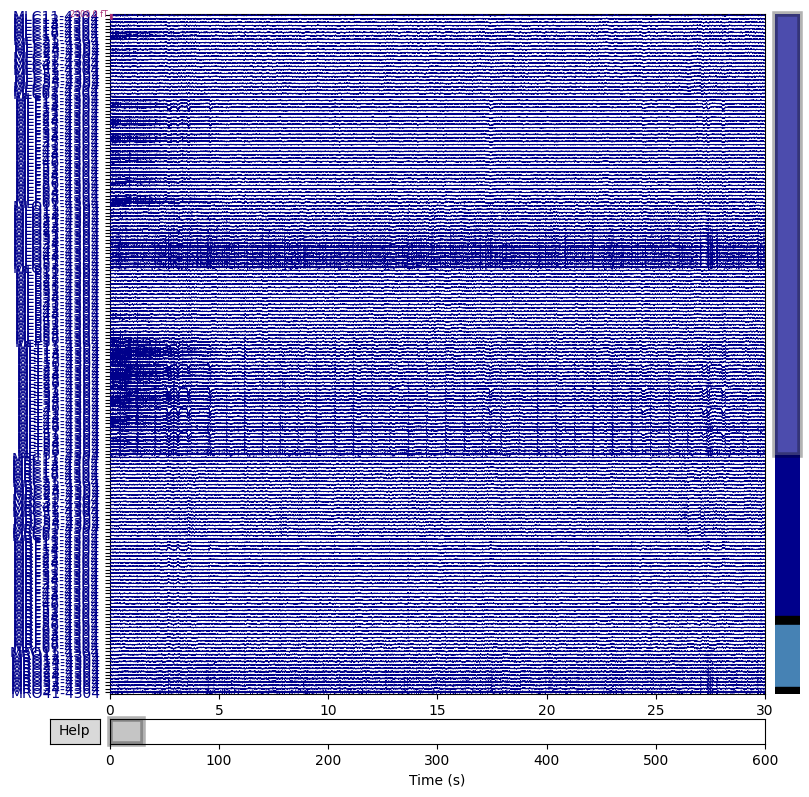

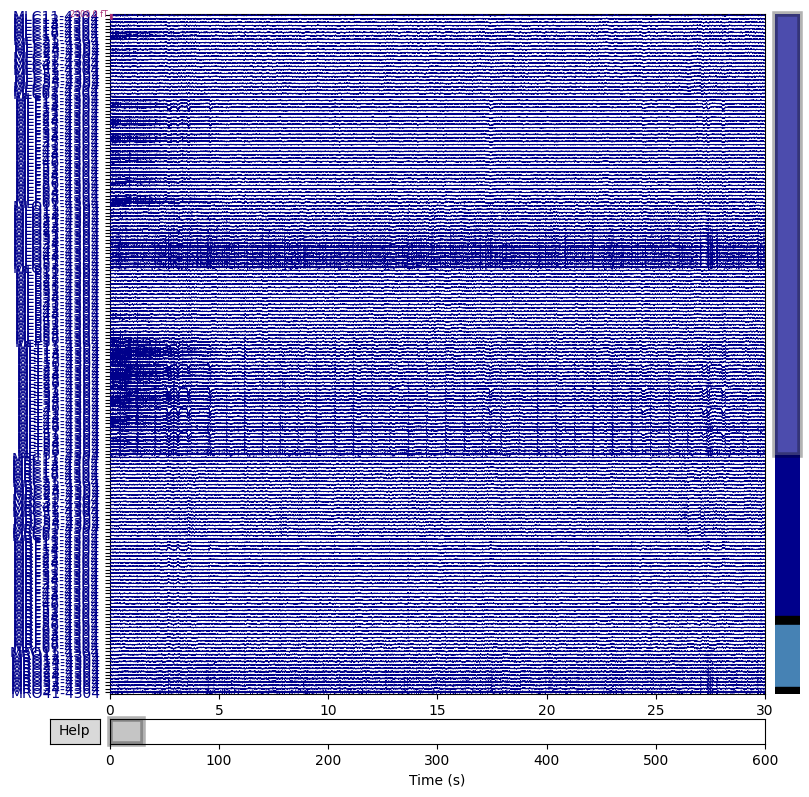

In [9]:
raw_vis.plot(duration=30, proj=False, n_channels=200)

In [9]:
ecg_evoked_aud = create_ecg_epochs(raw_aud).average()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 12000 samples (10.000 sec)

Number of ECG events detected : 813 (average pulse 81 / min.)
Not setting metadata
813 matching events found
No baseline correction applied
Using data from preloaded Raw for 813 events and 1201 original time points ...
1 bad epochs dropped
Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed f

Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.


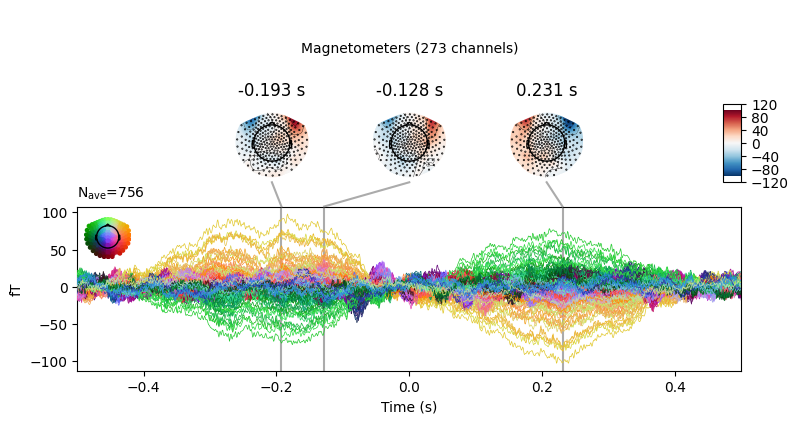

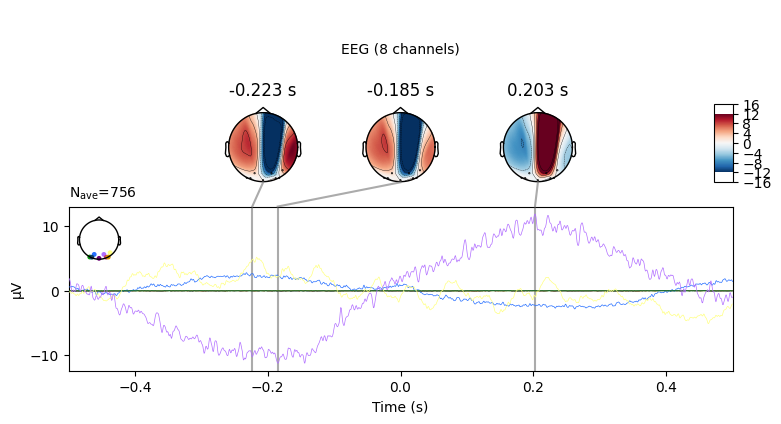

[<Figure size 800x420 with 7 Axes>, <Figure size 800x420 with 7 Axes>]

In [11]:
ecg_evoked_aud.apply_baseline((None,None))
ecg_evoked_aud.plot_joint()

In [7]:
projs_aud, events_aud = compute_proj_ecg(raw_aud, n_grad=1, n_mag=1, n_eeg=1, reject=None, ch_name="EEG059")

Including 0 SSP projectors from raw file
Running ECG SSP computation
Using channel EEG059 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 12000 samples (10.000 sec)

Number of ECG events detected : 547 (average pulse 54 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Low

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 309 out of 309 | elapsed:   10.1s finished


Not setting metadata
547 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 547 events and 721 original time points ...
0 bad epochs dropped
No gradiometers found. Forcing n_grad to 0
Adding projection: axial--0.200-0.400-PCA-01
Adding projection: eeg--0.200-0.400-PCA-01
Done.


In [28]:
projs_aud

[<Projection | ECG-axial--0.200-0.400-PCA-01, active : False, n_channels : 273, exp. var : 84.89%>,
 <Projection | ECG-eeg--0.200-0.400-PCA-01, active : False, n_channels : 8, exp. var : 99.93%>]

: 

In [ ]:
raw_aud.add_proj(projs_aud, remove_existing=True)

In [8]:
projs_vis, events_vis = compute_proj_ecg(raw_vis, n_grad=1, n_mag=1, n_eeg=1, reject=None, ch_name="EEG059")

Including 0 SSP projectors from raw file
Running ECG SSP computation
Using channel EEG059 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 12000 samples (10.000 sec)

Number of ECG events detected : 1048 (average pulse 104 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- L

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    8.5s finished


Not setting metadata
1048 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1048 events and 721 original time points ...
1 bad epochs dropped
No gradiometers found. Forcing n_grad to 0
Adding projection: axial--0.200-0.400-PCA-01
Adding projection: eeg--0.200-0.400-PCA-01
Done.


In [20]:
raw_vis.add_proj(projs_vis, remove_existing=True)

2 projection items deactivated


<RawCTF | sub-V1001_task-visual_meg.meg4, 308 x 720001 (600.0 s), ~1.65 GB, data loaded>

In [9]:
eog_projs_vis, _ = compute_proj_eog(raw_vis, ch_name=["EEG057", "EEG058"],n_grad=1, n_mag=1, n_eeg=1, reject=None, no_proj=False)

Including 0 SSP projectors from raw file
Running EOG SSP computation
Using EOG channels: EEG057, EEG058
EOG channel index for this subject is: [304 305]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 12000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 107 significant peaks
Number of EOG events detected: 107
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    8.5s finished


Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 107 events and 481 original time points ...
1 bad epochs dropped
No gradiometers found. Forcing n_grad to 0
Adding projection: axial--0.200-0.200-PCA-01
Adding projection: eeg--0.200-0.200-PCA-01
Done.


In [22]:
raw_vis.add_proj(eog_projs_vis, remove_existing=False)

2 projection items deactivated


<RawCTF | sub-V1001_task-visual_meg.meg4, 308 x 720001 (600.0 s), ~1.65 GB, data loaded>

In [10]:
eog_projs_aud, _ = compute_proj_eog(raw_aud, ch_name=["EEG057", "EEG058"],n_grad=1, n_mag=1, n_eeg=1, reject=None, no_proj=False)

Including 0 SSP projectors from raw file
Running EOG SSP computation
Using EOG channels: EEG057, EEG058
EOG channel index for this subject is: [304 305]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 12000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 116 significant peaks
Number of EOG events detected: 116
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 309 out of 309 | elapsed:    9.0s finished


Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 116 events and 481 original time points ...
0 bad epochs dropped
No gradiometers found. Forcing n_grad to 0
Adding projection: axial--0.200-0.200-PCA-01
Adding projection: eeg--0.200-0.200-PCA-01
Done.


In [23]:
raw_aud.add_proj(eog_projs_aud, remove_existing=False)

2 projection items deactivated


<RawCTF | sub-A2002_task-auditory_meg.meg4, 312 x 720001 (600.0 s), ~1.67 GB, data loaded>

# Epoching

## Auditory task

In [21]:
events_aud = mne.find_events(raw_aud, stim_channel='UPPT001', verbose=True)

320 events found
Event IDs: [ 1  2  3  4  5  6  7  8 10 11 12 14 15 20 40]


In [24]:
event_id = {
    'onset/sentence/RC+sentence/individual_word': 1,
    'onset/sentence/RC+sentence/target_word': 2,
    'onset/sentence/RC-sentence/individual_word': 5,
    'onset/sentence/RC-sentence/target_word': 6,
    'onset/word_list/RC-sentence/individual_word': 7,
    'onset/word_list/RC-sentence/target_word': 8,
    'instruction/word_or_sentence': 10,
    'Audio start' : 14,
    'offset': 15,
    'pre-trial_baseline': 20,
    'question': 40
}

/tmp/ipykernel_45515/868201639.py:1: RuntimeWarning: event 3 missing from event_id will be ignored
  fig = mne.viz.plot_events(events_aud, sfreq=raw_aud.info['sfreq'],
/tmp/ipykernel_45515/868201639.py:1: RuntimeWarning: event 4 missing from event_id will be ignored
  fig = mne.viz.plot_events(events_aud, sfreq=raw_aud.info['sfreq'],
/tmp/ipykernel_45515/868201639.py:1: RuntimeWarning: event 11 missing from event_id will be ignored
  fig = mne.viz.plot_events(events_aud, sfreq=raw_aud.info['sfreq'],
/tmp/ipykernel_45515/868201639.py:1: RuntimeWarning: event 12 missing from event_id will be ignored
  fig = mne.viz.plot_events(events_aud, sfreq=raw_aud.info['sfreq'],
/tmp/ipykernel_45515/868201639.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events_aud, sfreq=raw_aud.info['sfreq'],


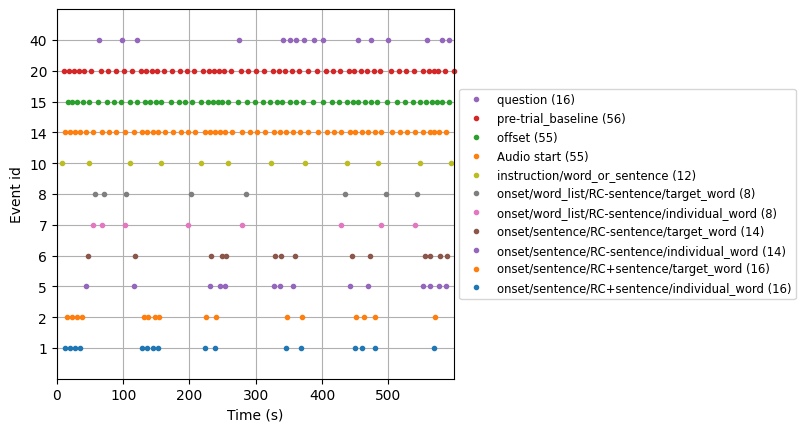

In [60]:
fig = mne.viz.plot_events(events_aud, sfreq=raw_aud.info['sfreq'],
                          event_id=event_id)

In [94]:
event_id = {
    '1': 1,
    '2': 2,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '10': 10,
    'W': 14,
    'E': 15,
    'B':20
}

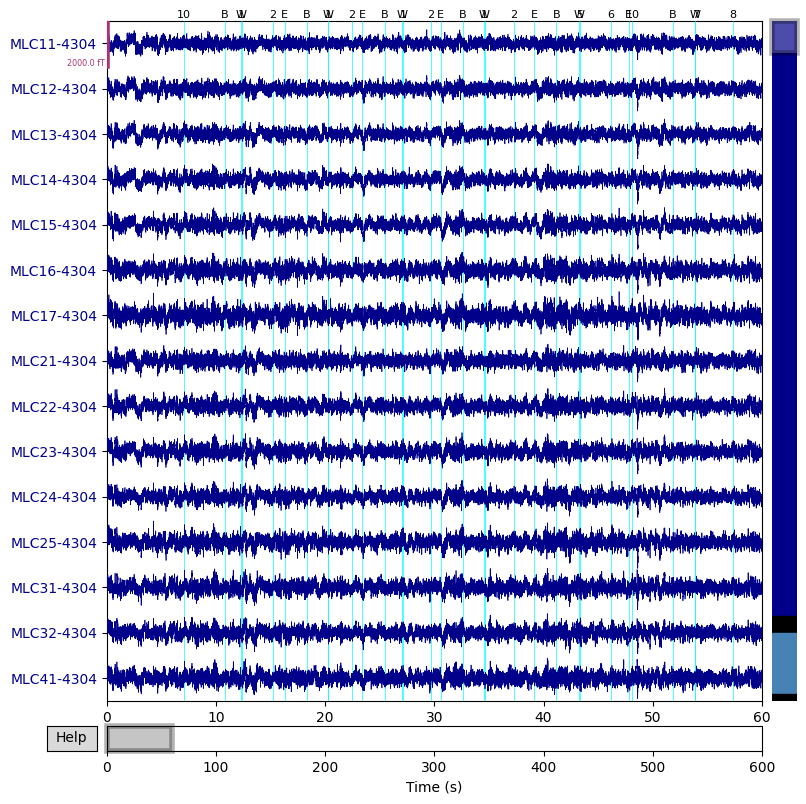

In [95]:
raw_aud.plot(duration=60, n_channels=15, event_id=event_id, events=events_aud);

In [113]:
start = events_aud[events_aud[:,2] == 14]
end = events_aud[events_aud[:,2] == 15]
duree = (end - start)/raw_aud.info['sfreq']

print(np.max(duree), np.mean(duree))

9.611666666666666 1.9333434343434344


In [142]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 10 # end of each epoch
baseline = (-0.2, 0)  # means from 200ms before to stim onset (t = 0)

## Visual task

In [22]:
events_vis = mne.find_events(raw_vis, stim_channel='UPPT001', verbose=True)

1082 events found
Event IDs: [ 1  2  5  6  7  8 10 15 20 40]


In [23]:
event_id = {
    'onset/sentence/RC+/individual_word': 1,
    'onset/sentence/RC+/target_word': 2,
    #'onset/word_list/RC+/individual_word' : 3,
    #'onset/word_list/RC+/target_word' : 4,
    'onset/sentence/RC-/individual_word': 5,
    'onset/sentence/RC-/target_word': 6,
    'onset/word_list/RC-/individual_word': 7,
    'onset/word_list/RC-/target_word': 8,
    'instruction/word_or_sentence': 10,
    'offset': 15,
    'pre-trial_baseline': 20,
    'question': 40
}

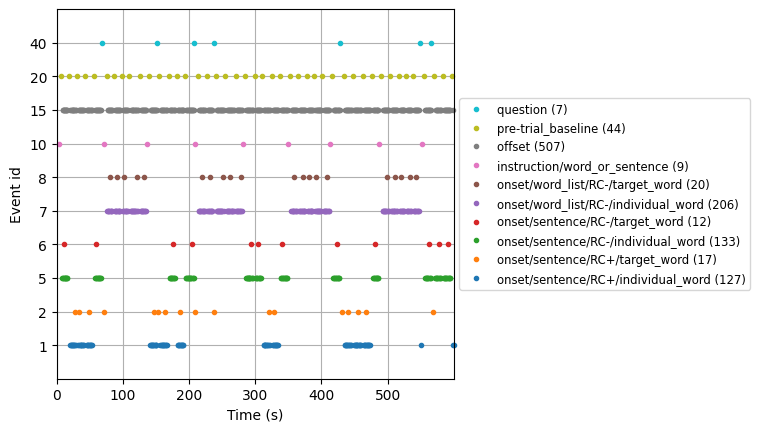

In [11]:
fig = mne.viz.plot_events(events_vis, sfreq=raw_vis.info['sfreq'],
                          event_id=event_id)

In [14]:
event_id = {
    '1': 1,
    '2': 2,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    'B': 10,
    'E': 15,
    'S': 20
}

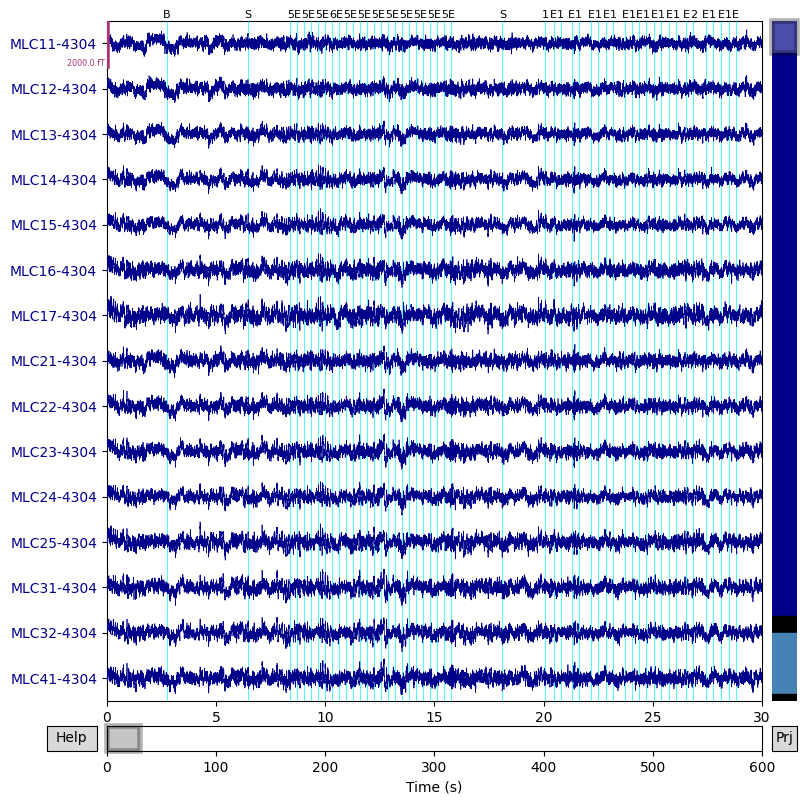

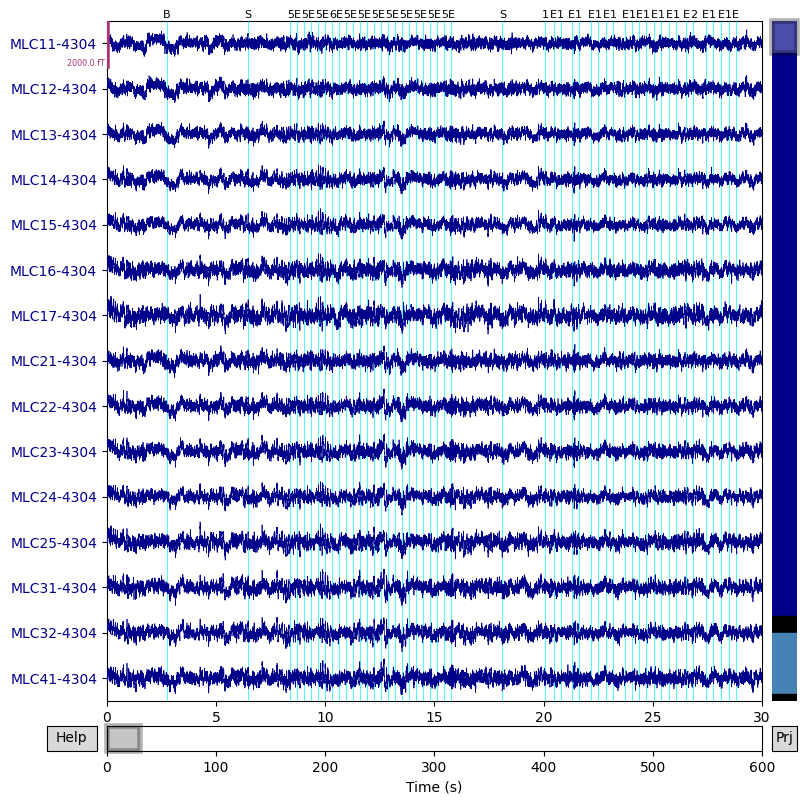

In [25]:
raw_aud.plot(duration=30, n_channels=15, event_id=event_id, events=events_vis)

In [141]:
print(events_vis)

[[  3282      0     10]
 [  7735      0     20]
 [ 10081      0      5]
 ...
 [718901      0      1]
 [719603      0     15]
 [719997      0      1]]


In [135]:
def ecart_event(events, raw):
    duree = []
    for i in range(events.shape[0]-1):
        duree.append(np.abs(events[i+1,0] - events[i,0]))
    return np.array(duree)/raw.info['sfreq']

In [136]:
bloc = events_vis[events_vis[:,2] == 10]
duree = ecart_event(bloc, raw_vis)

print(np.max(duree), np.mean(duree))

74.33833333333334 68.60145833333334


In [138]:
bloc

array([[  3282,      0,     10],
       [ 85587,      0,     10],
       [162891,      0,     10],
       [251241,      0,     10],
       [336953,      0,     10],
       [419292,      0,     10],
       [495072,      0,     10],
       [584278,      0,     10],
       [661856,      0,     10]])

In [ ]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 15 # end of each epoch
baseline = (-0.2, 0)  # means from 200ms before to stim onset (t = 0)

# Functions

In [6]:
def epochs_phrase_liste(events, task):
    """
    :param events: events object 
    :param task: visual or auditory, that give the events of interest to segmentize the sentences or the random lists
    """
    phrases = []
    listes = []
    if task == 'visual':
        index = 20
    elif task == 'auditory':
        index = 14
    for i in range(len(events)-1):
        if events[i,2]==index:
            if events[i+1,2]==5:
                phrases.append(events[i])
            elif events[i+1,2]==7:
                listes.append(events[i])
    return phrases,listes

In [7]:
def epoching(raw, events, tmin, tmax, events_id=None):
    picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=False, stim=False, exclude='bads')
    epochs = mne.Epochs(raw, events, events_id, tmin, tmax, proj=True,
                    picks=picks, baseline=None)
    epochs.load_data()
    return epochs

In [8]:
def Epoch_to_entropyrate(epoch, nb_symb):
    entropy_list = []
    M = epoch.get_data()
    for i in range(len(M)):
        H = D.phase_cluster(M[i], nb_symb)
        entropy_list.append(H)
    return(np.array(entropy_list))

# Phrases simples VS Listes de mots issues de phrases simples

## Visual task

In [25]:
phrases, listes = epochs_phrase_liste(events_vis, 'visual')

In [26]:
epochs_phrases_vis = epoching(raw_vis, phrases, tmin, tmax)
epochs_listes_vis = epoching(raw_vis, listes, tmin, tmax)

NameError: name 'tmin' is not defined

In [22]:
len(epochs_listes_vis.times)

18241

In [30]:
len(epochs_phrases_vis)

12

In [35]:
M_phrases_vis = epochs_phrases_vis.get_data()

In [49]:
H1 = lempel_ziv(partition(M_phrases_vis[0,0], method='histogram',nbin=2))

In [32]:
H_phrases_vis = Epoch_to_entropyrate(epochs_phrases_vis, 2)

In [73]:
H_phrases_vis.shape

(12, 301)

In [127]:
H_listes_vis = Epoch_to_entropyrate(epochs_listes_vis, 2)

In [150]:
with open('H_listes_vis.npy', 'wb') as f:
    np.save(f, H_listes_vis)

In [151]:
with open('H_phrases_vis.npy', 'wb') as f:
    np.save(f, H_phrases_vis)

In [48]:
H_listes_vis = np.load('H_listes_vis.npy')
H_phrases_vis = np.load('H_phrases_vis.npy')

In [49]:
H_phrases_vis_mean = np.median(H_phrases_vis,0)
H_listes_vis_mean = np.median(H_listes_vis,0)

Text(0.5, 1.0, 'Visual/Sentence')

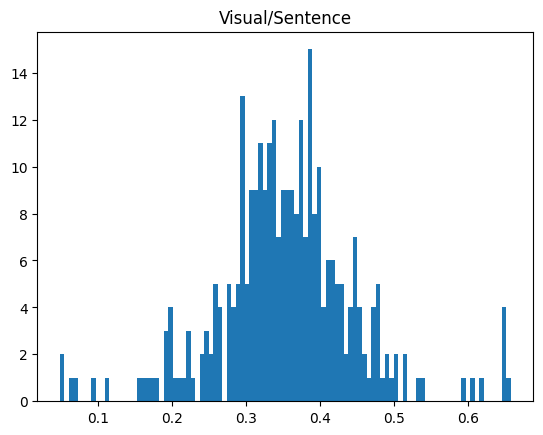

In [48]:
plt.hist(H_phrases_vis_mean, bins=100)
plt.title("Visual/Sentence")

Text(0.5, 1.0, 'Visual/Random list')

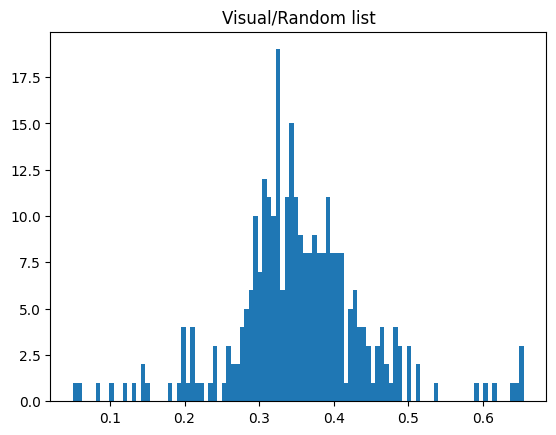

In [49]:
plt.hist(H_listes_vis_mean, bins=100)
plt.title("Visual/Random list")

## Auditory task

In [143]:
phrases, listes = epochs_phrase_liste(events_aud, 'auditory')

In [145]:
epochs_phrases_aud = epoching(raw_aud, phrases, tmin, tmax)
epochs_listes_aud = epoching(raw_aud, listes, tmin, tmax)

Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 14 events and 12241 original time points ...
0 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 12241 original time points ...
0 bad epochs dropped


In [146]:
H_phrases_aud = Epoch_to_entropyrate(epochs_phrases_aud, 2)

In [148]:
H_listes_aud = Epoch_to_entropyrate(epochs_listes_aud, 2)

In [149]:
with open('H_listes_aud.npy', 'wb') as f:
    np.save(f, H_listes_aud)

In [150]:
with open('H_phrases_aud.npy', 'wb') as f:
    np.save(f, H_phrases_aud)

In [50]:
H_listes_aud = np.load('H_listes_aud.npy')
H_phrases_aud = np.load('H_phrases_aud.npy')

In [51]:
H_phrases_aud_mean = np.median(H_phrases_aud,0)
H_listes_aud_mean = np.median(H_listes_aud,0)

Text(0.5, 1.0, 'Auditory/Sentence')

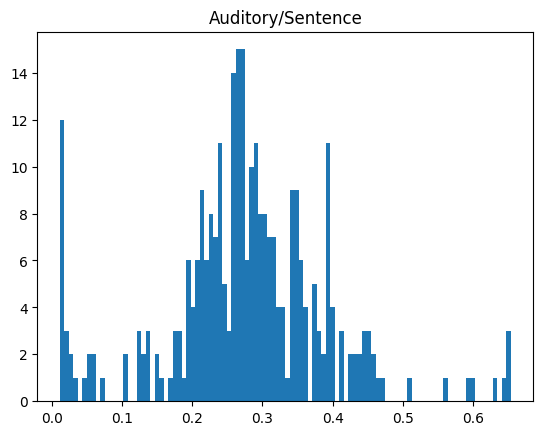

In [53]:
plt.hist(H_phrases_aud_mean, bins=100)
plt.title("Auditory/Sentence")

Text(0.5, 1.0, 'Auditory/Random list')

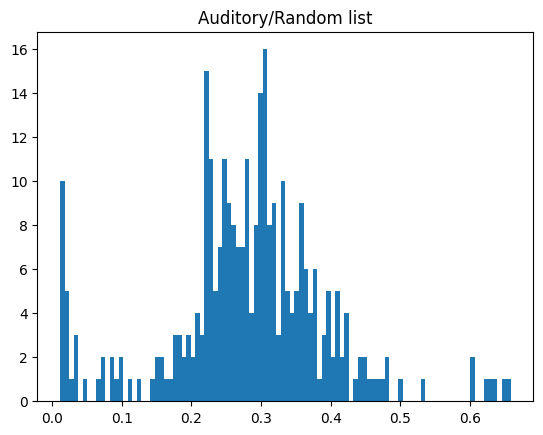

In [54]:
plt.hist(H_listes_aud_mean, bins=100)
plt.title("Auditory/Random list")

# Individual word vs target word

In [9]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 1.2   #end of each epoch
baseline = (-0.2, 0)  # means from 200ms before to stim onset (t = 0)

## Visual task

In [10]:
events = mne.find_events(raw_vis, stim_channel='UPPT001', verbose=True)

1082 events found
Event IDs: [ 1  2  5  6  7  8 10 15 20 40]


### In a RC- sentence

In [11]:
target_word = events[events[:,2]==6]
individual_word = events[events[:,2]==5]

In [12]:
epochs_target_word = epoching(raw_vis, target_word, tmin, tmax)
epochs_individual_word = epoching(raw_vis, individual_word, tmin, tmax)

Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 12 events and 1681 original time points ...
0 bad epochs dropped
Not setting metadata
133 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 133 events and 1681 original time points ...
0 bad epochs dropped


In [6]:
a = np.array(1)

In [13]:
H_individual_s_vis = Epoch_to_entropyrate(epochs_individual_word, 2)

TypeError: phase_cluster() got an unexpected keyword argument 'bins'

In [15]:
H_target_s_vis = Epoch_to_entropyrate(epochs_target_word, 2)

: 

: 

In [31]:
H_individual_s_vis = np.median(H_individual_s_vis, 0)
H_target_s_vis = np.median(H_target_s_vis, 0)

Text(0.5, 1.0, 'Visual/Sentence/Individual word')

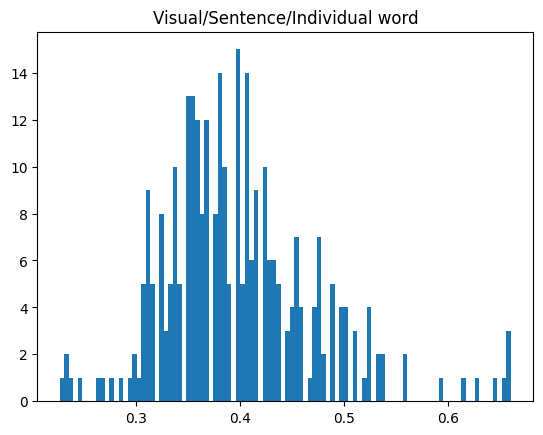

In [21]:
plt.hist(H_individual_s_vis, bins=100)
plt.title("Visual/Sentence/Individual word")

Text(0.5, 1.0, 'Visual/Sentence/Target word')

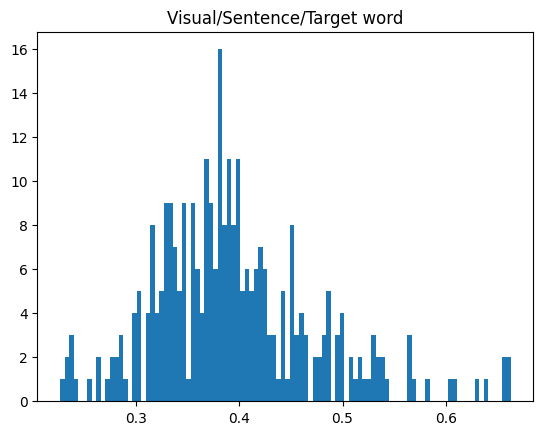

In [22]:
plt.hist(H_target_s_vis, bins=100)
plt.title("Visual/Sentence/Target word")

### In a list of words

In [32]:
target_word = events[events[:,2]==8]
individual_word = events[events[:,2]==7]

In [33]:
epochs_target_word = epoching(raw_vis, target_word, tmin, tmax)
epochs_individual_word = epoching(raw_vis, individual_word, tmin, tmax)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 1681 original time points ...
0 bad epochs dropped
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 206 events and 1681 original time points ...
0 bad epochs dropped


In [34]:
H_individual_l_vis = Epoch_to_entropyrate(epochs_individual_word, 2)

In [35]:
H_target_l_vis = Epoch_to_entropyrate(epochs_target_word, 2)

In [36]:
H_individual_l_vis = np.median(H_individual_l_vis, 0)
H_target_l_vis = np.median(H_target_l_vis, 0)

Text(0.5, 1.0, 'Visual/Random List/Target word')

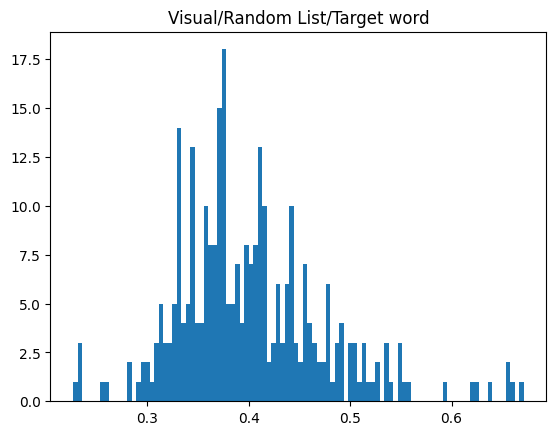

In [28]:
plt.hist(H_target_l_vis, bins=100)
plt.title("Visual/Random List/Target word")

Text(0.5, 1.0, 'Visual/Random List/Individual word')

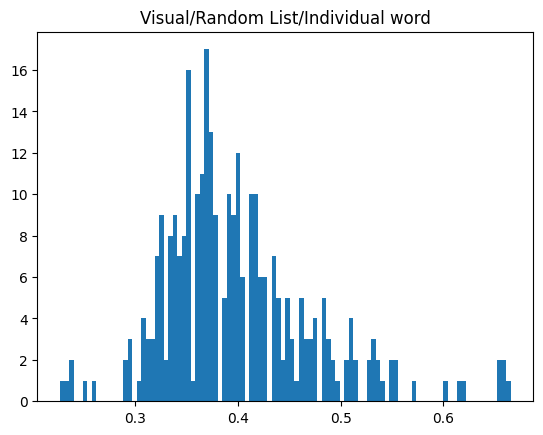

In [29]:
plt.hist(H_individual_l_vis, bins=100)
plt.title("Visual/Random List/Individual word")

## Auditory task

In [37]:
events = mne.find_events(raw_aud, stim_channel='UPPT001', verbose=True)

320 events found
Event IDs: [ 1  2  3  4  5  6  7  8 10 11 12 14 15 20 40]


### In a RC- sentence

In [38]:
target_word = events[events[:,2]==6]
individual_word = events[events[:,2]==5]

In [39]:
epochs_target_word = epoching(raw_vis, target_word, tmin, tmax)
epochs_individual_word = epoching(raw_vis, individual_word, tmin, tmax)

Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 14 events and 1681 original time points ...
0 bad epochs dropped
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 14 events and 1681 original time points ...
0 bad epochs dropped


In [40]:
H_individual_s_aud = Epoch_to_entropyrate(epochs_individual_word, 2)

In [41]:
H_target_s_aud = Epoch_to_entropyrate(epochs_target_word, 2)

In [42]:
H_individual_s_aud = np.median(H_individual_s_aud, 0)
H_target_s_aud = np.median(H_target_s_aud, 0)

Text(0.5, 1.0, 'Auditory/Sentence/Individual word')

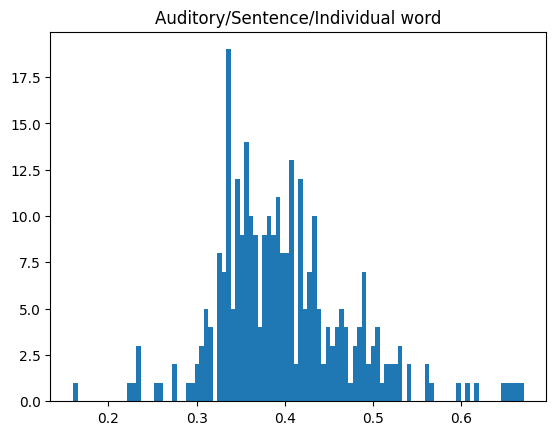

In [36]:
plt.hist(H_individual_s_aud, bins=100)
plt.title("Auditory/Sentence/Individual word")

Text(0.5, 1.0, 'Auditory/Sentence/Target word')

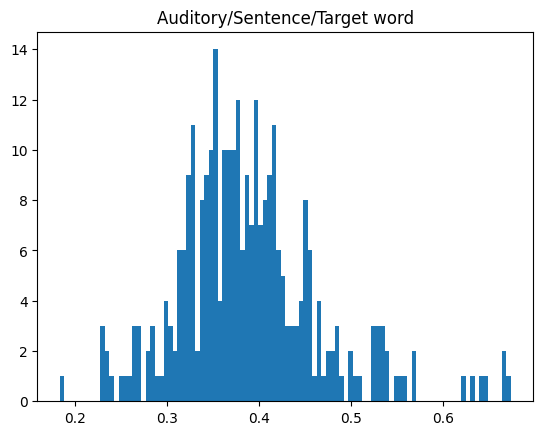

In [37]:
plt.hist(H_target_s_aud, bins=100)
plt.title("Auditory/Sentence/Target word")

### In a list of words

In [43]:
target_word = events[events[:,2]==8]
individual_word = events[events[:,2]==7]

In [44]:
epochs_target_word = epoching(raw_vis, target_word, tmin, tmax)
epochs_individual_word = epoching(raw_vis, individual_word, tmin, tmax)

Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 1681 original time points ...
0 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 1681 original time points ...
0 bad epochs dropped


In [45]:
H_individual_l_aud = Epoch_to_entropyrate(epochs_individual_word, 2)

In [46]:
H_target_l_aud = Epoch_to_entropyrate(epochs_target_word, 2)

In [47]:
H_individual_l_aud = np.median(H_individual_l_aud, 0)
H_target_l_aud = np.median(H_target_l_aud, 0)

Text(0.5, 1.0, 'Auditory/Random list/Target word')

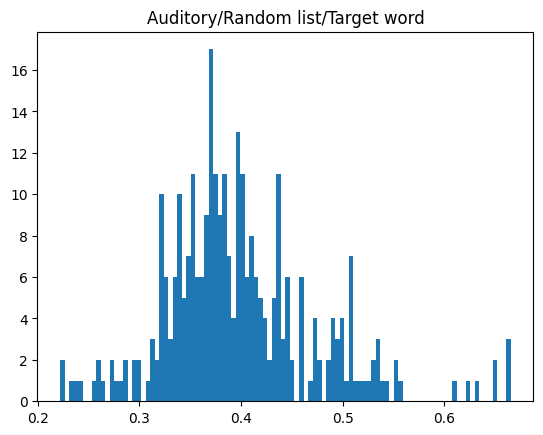

In [43]:
plt.hist(H_target_l_aud, bins=100)
plt.title("Auditory/Random list/Target word")

Text(0.5, 1.0, 'Auditory/Random list/Individual word')

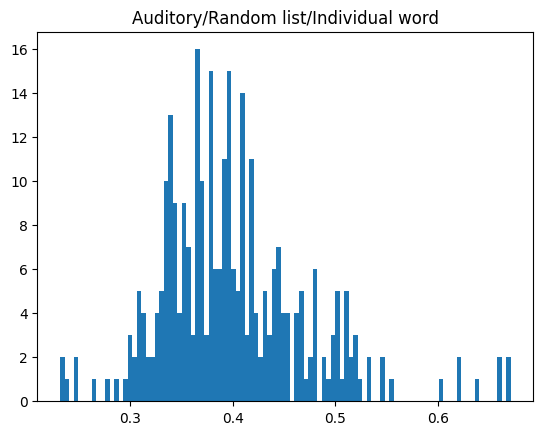

In [44]:
plt.hist(H_individual_l_aud, bins=100)
plt.title("Auditory/Random list/Individual word")

# Statistical comparison

## Calculation

### Unpaired T tests

In [68]:
ttest_vis_aud_l = stats.ttest_ind(H_listes_vis_mean, H_listes_aud_mean)
ttest_vis_aud_s = stats.ttest_ind(H_phrases_vis_mean, H_phrases_aud_mean)
ttest_s_l_vis = stats.ttest_ind(H_listes_vis_mean, H_phrases_vis_mean)
ttest_s_l_aud = stats.ttest_ind(H_listes_aud_mean, H_phrases_aud_mean)

In [45]:
ttest_l_vis = stats.ttest_ind(H_target_l_vis, H_individual_l_vis)
ttest_s_vis = stats.ttest_ind(H_target_s_vis, H_individual_s_vis)
ttest_s_aud = stats.ttest_ind(H_target_s_aud, H_individual_s_aud)
ttest_l_aud = stats.ttest_ind(H_target_l_aud, H_individual_l_aud)
ttest_individual_vis = stats.ttest_ind(H_individual_l_vis,H_individual_s_vis)
ttest_target_vis = stats.ttest_ind(H_target_l_vis, H_target_s_vis)
ttest_individual_aud = stats.ttest_ind(H_individual_l_aud, H_individual_s_aud)
ttest_target_aud = stats.ttest_ind(H_target_l_aud, H_target_s_aud)
ttest_target_l = stats.ttest_ind(H_target_l_vis, H_target_l_aud)
ttest_individual_l = stats.ttest_ind(H_individual_l_vis, H_individual_l_aud)
ttest_target_s = stats.ttest_ind(H_target_s_vis, H_target_s_aud)
ttest_individual_s = stats.ttest_ind(H_individual_s_vis, H_individual_s_aud)

### Paired T tests

In [52]:
ttest_vis_aud_l = stats.ttest_rel(H_listes_vis_mean, H_listes_aud_mean)
ttest_vis_aud_s = stats.ttest_rel(H_phrases_vis_mean, H_phrases_aud_mean)
ttest_s_l_vis = stats.ttest_rel(H_listes_vis_mean, H_phrases_vis_mean)
ttest_s_l_aud = stats.ttest_rel(H_listes_aud_mean, H_phrases_aud_mean)

In [53]:
ttest_l_vis = stats.ttest_rel(H_target_l_vis, H_individual_l_vis)
ttest_s_vis = stats.ttest_rel(H_target_s_vis, H_individual_s_vis)
ttest_s_aud = stats.ttest_rel(H_target_s_aud, H_individual_s_aud)
ttest_l_aud = stats.ttest_rel(H_target_l_aud, H_individual_l_aud)
ttest_individual_vis = stats.ttest_rel(H_individual_l_vis,H_individual_s_vis)
ttest_target_vis = stats.ttest_rel(H_target_l_vis, H_target_s_vis)
ttest_individual_aud = stats.ttest_rel(H_individual_l_aud, H_individual_s_aud)
ttest_target_aud = stats.ttest_rel(H_target_l_aud, H_target_s_aud)
ttest_target_l = stats.ttest_rel(H_target_l_vis, H_target_l_aud)
ttest_individual_l = stats.ttest_rel(H_individual_l_vis, H_individual_l_aud)
ttest_target_s = stats.ttest_rel(H_target_s_vis, H_target_s_aud)
ttest_individual_s = stats.ttest_rel(H_individual_s_vis, H_individual_s_aud)

## Target word vs Individual word

### Visual task

#### Au sein de Random lists

In [54]:
ttest_l_vis

TtestResult(statistic=3.7020320710968453, pvalue=0.0002544600986272114, df=300)

#### Au sein de Sentences

In [55]:
ttest_s_vis

TtestResult(statistic=-2.746931536947648, pvalue=0.006379287033702424, df=300)

### Auditory task

#### Au sein de Random lists

In [56]:
ttest_l_aud

TtestResult(statistic=-1.1445033484419673, pvalue=0.2533272570437718, df=300)

#### Au sein de Sentences

In [59]:
ttest_s_aud

TtestResult(statistic=-6.321637706704669, pvalue=9.356760489763991e-10, df=300)

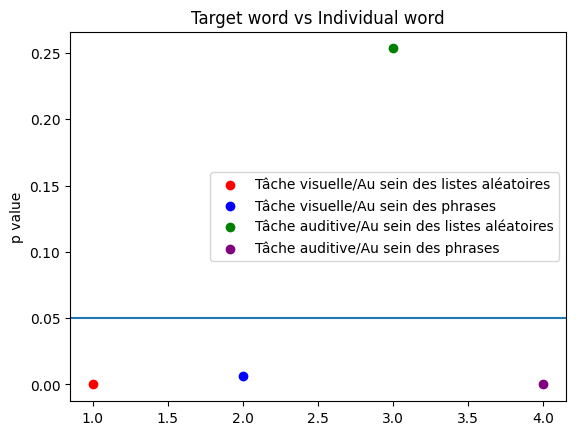

In [4]:
# Données
x = [1, 2, 3, 4]
y = [0.0002544600986272114, 0.006379287033702424, 0.2533272570437718, 9.356760489763991e-10]
labels = ['Tâche visuelle/Au sein des listes aléatoires', 'Tâche visuelle/Au sein des phrases', 'Tâche auditive/Au sein des listes aléatoires', 'Tâche auditive/Au sein des phrases']

# Couleurs pour chaque point
colors = ['red', 'blue', 'green', 'purple']

# Créer le graphique
fig, ax = plt.subplots()

for i in range(len(x)):
    ax.scatter(x[i], y[i], color=colors[i], label=labels[i])

plt.axhline(0.05)
# Légende
ax.legend()

# Titres et étiquettes des axes
ax.set_title('Target word vs Individual word')
ax.set_ylabel('p value')

# Afficher le graphique
plt.show()

## Sentence vs Random list

### Visual task

#### Focus on target words

In [60]:
ttest_target_vis

TtestResult(statistic=4.802566793497285, pvalue=2.4770163503722146e-06, df=300)

#### Focus on individual words

In [61]:
ttest_individual_vis

TtestResult(statistic=1.811087824478216, pvalue=0.07112736757052708, df=300)

### Auditory task

#### Focus on target words

In [62]:
ttest_target_aud

TtestResult(statistic=5.271171697100641, pvalue=2.596202412995333e-07, df=300)

#### Focus on individual words

In [63]:
ttest_individual_aud 

TtestResult(statistic=0.5898036980030423, pvalue=0.5557662091856761, df=300)

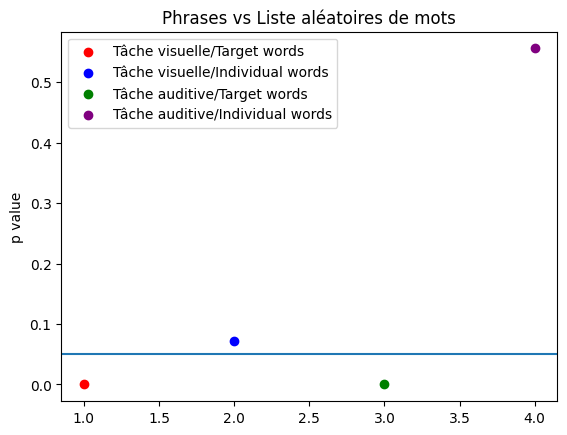

In [7]:
# Données
x = [1, 2, 3, 4]
y = [2.4770163503722146e-06, 0.07112736757052708, 2.596202412995333e-07, 0.5557662091856761]
labels = ['Tâche visuelle/Target words', 'Tâche visuelle/Individual words', 'Tâche auditive/Target words', 'Tâche auditive/Individual words']

# Couleurs pour chaque point
colors = ['red', 'blue', 'green', 'purple']

# Créer le graphique
fig, ax = plt.subplots()

for i in range(len(x)):
    ax.scatter(x[i], y[i], color=colors[i], label=labels[i])

plt.axhline(0.05)
# Légende
ax.legend()

# Titres et étiquettes des axes
ax.set_title('Phrases vs Liste aléatoires de mots')
ax.set_ylabel('p value')

# Afficher le graphique
plt.show()

## Visual vs Auditory

### Au sein de Random lists

#### Focus on target words

In [64]:
ttest_target_l

TtestResult(statistic=2.5095808947475287, pvalue=0.012614130665639347, df=300)

#### Focus on individual words

In [65]:
ttest_individual_l

TtestResult(statistic=-1.126711329868825, pvalue=0.2607649772790637, df=300)

### Au sein de Sentences

#### Focus on target words

In [66]:
ttest_target_s

TtestResult(statistic=4.1709500674134965, pvalue=3.9754604238496124e-05, df=300)

#### Focus on individual words

In [67]:
ttest_individual_s

TtestResult(statistic=-1.4036614144713668, pvalue=0.16145396139436008, df=300)

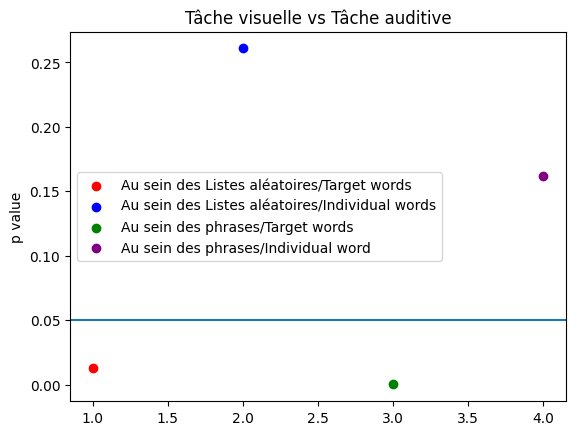

In [8]:
# Données
x = [1, 2, 3, 4]
y = [0.012614130665639347, 0.2607649772790637, 3.9754604238496124e-05, 0.16145396139436008]
labels = ['Au sein des Listes aléatoires/Target words', 'Au sein des Listes aléatoires/Individual words', 'Au sein des phrases/Target words', 'Au sein des phrases/Individual word']

# Couleurs pour chaque point
colors = ['red', 'blue', 'green', 'purple']

# Créer le graphique
fig, ax = plt.subplots()

for i in range(len(x)):
    ax.scatter(x[i], y[i], color=colors[i], label=labels[i])

plt.axhline(0.05)
# Légende
ax.legend()

# Titres et étiquettes des axes
ax.set_title('Tâche visuelle vs Tâche auditive')
ax.set_ylabel('p value')

# Afficher le graphique
plt.show()

### Représentation graphique des p values significatives

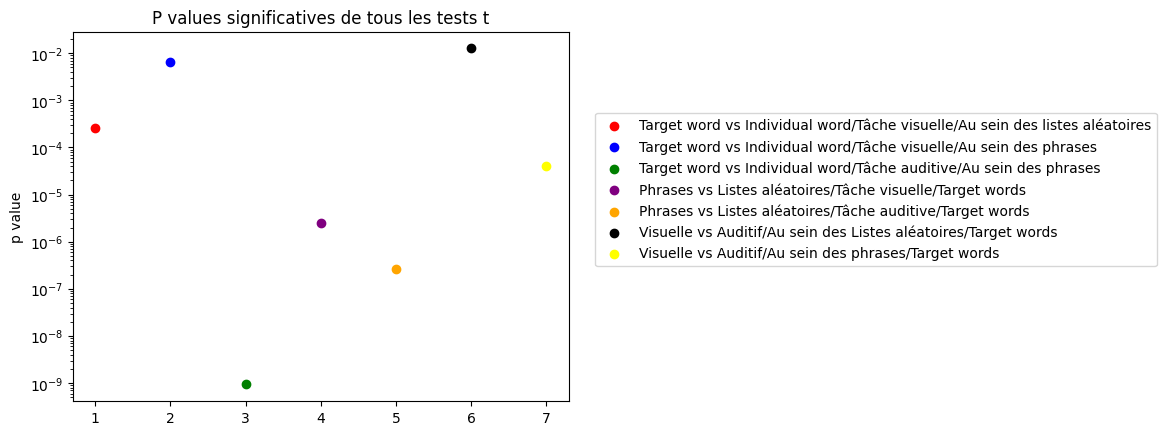

In [18]:
# P values significatives
x = [1, 2, 3, 4, 5, 6, 7]
y = [0.0002544600986272114, 0.006379287033702424, 9.356760489763991e-10, 2.4770163503722146e-06, 2.596202412995333e-07, 0.012614130665639347, 3.9754604238496124e-05]
labels = ['Target word vs Individual word/Tâche visuelle/Au sein des listes aléatoires', 'Target word vs Individual word/Tâche visuelle/Au sein des phrases', 'Target word vs Individual word/Tâche auditive/Au sein des phrases', 'Phrases vs Listes aléatoires/Tâche visuelle/Target words', 'Phrases vs Listes aléatoires/Tâche auditive/Target words', 'Visuelle vs Auditif/Au sein des Listes aléatoires/Target words', 'Visuelle vs Auditif/Au sein des phrases/Target words']

# Couleurs pour chaque point
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'yellow']

# Créer le graphique
fig, ax = plt.subplots()

for i in range(len(x)):
    ax.scatter(x[i], y[i], color=colors[i], label=labels[i])

# Légende
ax.legend()

# Légende en dehors du graphe (en haut à droite, par exemple)
ax.legend(loc='upper right', bbox_to_anchor=(2.2, 0.8))

# Titres et étiquettes des axes
ax.set_title('P values significatives de tous les tests t')
ax.set_ylabel('p value')

# On utilise une échelle logarithmique pour pouvoir distinguer les différentes valeurs de p value 
ax.set_yscale('log')

# Afficher le graphique
plt.show()

## Avec les blocs entiers

### Visual vs Auditory : comparison of Random lists

In [68]:
ttest_vis_aud_l

TtestResult(statistic=12.85172600038691, pvalue=2.051914942799493e-30, df=300)

### Visual vs Auditory : comparison of Sentences

In [69]:
ttest_vis_aud_s

TtestResult(statistic=13.879509669307046, pvalue=3.5754459819746858e-34, df=300)

### Sentences vs Random lists : Visual task

In [70]:
ttest_s_l_vis

TtestResult(statistic=-0.5086718490719458, pvalue=0.6113561292198841, df=300)

### Sentences vs Random lists : Auditory task

In [71]:
ttest_s_l_aud

TtestResult(statistic=3.043265233317558, pvalue=0.002547403483836044, df=300)